Jakub Kwaśniak

Mehmet Emre Durmus

Jakub Domański

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Ordinary differential equations training

## 1. First training, with  a simple equation


We want to solve the very simple equation :$\frac{dx}{dt}=-kx$, with $x(t=0)=x_0$ as an initial boundary condition.
1) Solve the equation anlaytically and write the solution below x(t)=

$$ x(t) = x_0e^{-kt} $$
since the derivative of the function is equal to the function itself times a constant - typical exponential behaviour.

To what physical process it would correspond ? What is the dimension of $1/k$ assuming that $t$ is a time ?

This solution of the ordinary differential equation would correspond to any behaviour that is exponentially decaying in time, for example a voltage over a capacitor in a RC circuit
$$ V(t) = V_0e^{-t/RC},$$
where $V_0$ is the initial voltage at time $t=0$ related to the voltage supplied by the source, $R$ is the resistance, and $C$ is the capacitance of the circuit.

Since we require the exponential to be unitless and the dimension of $t$ is time, the dimension of $1/k$ must be time as well. In other words, the dimension of $x(t)$ is carried by the initial parameter $x_0 = x(t=0)$.

In the following we call $f(x,t)$ the derivative $\frac{dx}{dt}=-kx $, so that the system we want to solve can be simply written $\frac{dx}{dt}=f(x,t)$

#### 1.1 Euler solver

Build a function called $deriv(x,t)$ that returns f(x,t). k will be declared as a global variables, defined outside the function $deriv(x,t)$. You can use the following template. Print f for x0=1, t=10., k=1.

In [2]:
def deriv(x: float, t: float) -> float:
    """Function returning the value of dx/dt = -kx.
    Params:
    x (float): x-parameter value
    t (float): time parameter value
    Returns:
    -k*x (float): dx/dt
    """
    global k
    return -k*x
# Initialise constants and parameters
k = 1
x_0 = 1
t = 10 # Note that the time in this case is not required, it is used to generalise the approach as much as possible

print(deriv(x_0, t))

-1


Build a simple Euler solver: define dt, and write an iterative procedure that at each time step 
* 1) compute f(x,t)
* 2) increment x according to the Euler scheme : x(t+dt)=x(t)+dt*f(x,t)
* 3) keep in memory the new value of x(t)
* 3) time=time+dt

Of course, before that you must initialize time=0 and x(t=0)=1 


plot the result for dt=0.1 and for time going from 0 to t=5

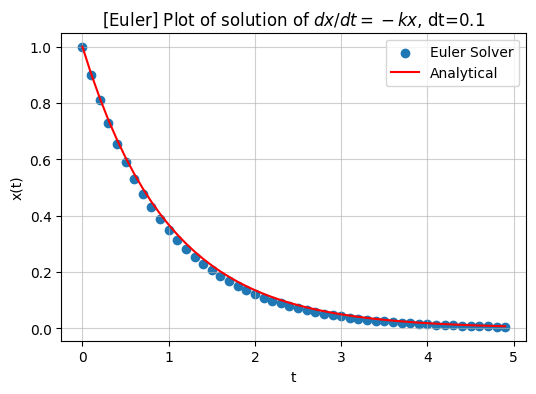

In [3]:
def euler(x_0: float, dt: float, t: np.ndarray) -> np.ndarray:
    """Function implementing the first-order Euler solver to an ordinary differential equation.
    Params:
    x_0 (float): initial value of x at t=0
    dt (float): time step
    t (np.ndarray): array of values of time for which to evaluate x(t)

    Returns:
    x: array of values of x(t)
    """

    # Initialise the result array
    x = np.array([])
    
    for idx, time in enumerate(t):
        if idx == 0: x = np.append(x, x_0)  
        else: x = np.append(x, x[idx-1] + dt*deriv(x[idx-1], t))
            
    return x

# Initial value x_0 = x(t=0)
x_0 = 1

# Time array
dt = 0.1 # Time step - resolution of the algorithm
t = np.arange(0, 5, dt)

# Solve the ODE
x = euler(x_0, dt, t)

# Analytical solution
f = lambda t: x_0*np.exp(-k*t)

fig, ax = plt.subplots(figsize=(6,4))
plt.scatter(t, x, label="Euler Solver")
plt.plot(t, f(t), label="Analytical", color="r")

plt.title(r"[Euler] Plot of solution of $dx/dt = -kx$, dt={}".format(dt))
ax.set_xlabel("t")
ax.set_ylabel("x(t)")

plt.legend()
plt.grid(alpha=0.6)
plt.show()

Plot the difference between the numeric solution and the anlytical solution. Do you have comments?

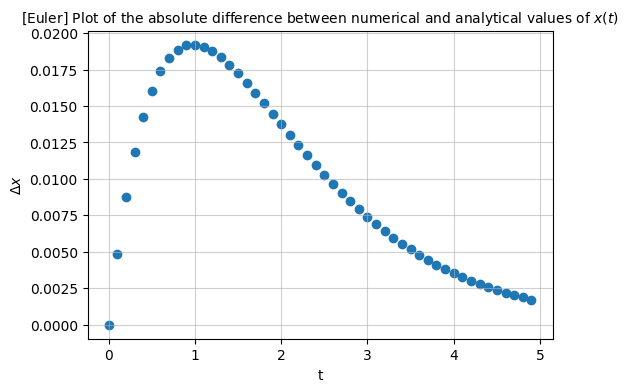

In [4]:
# Get the difference in x(t) values between the Euler solver and the analytical computation
dif = abs(x - f(t)) # Numerical - Analytical

fig, ax = plt.subplots(figsize=(6,4))
plt.scatter(t, dif)

plt.title(r"[Euler] Plot of the absolute difference between numerical and analytical values of $x(t)$", fontsize=10)
ax.set_xlabel("t")
ax.set_ylabel(r"$\Delta x$")
plt.grid(alpha=0.6)
plt.show()

The plot of the absolute difference between analytical and numerical values of function displays a maximum error at $t=1$. The function also goes to zero as $t$ increases, due to the fact that $x(t)$ itself goes to zero, as it is a decaying exponential function.

Redo the same exercice for dt=0.2, 0.4, 0.8, 1.6,Comment ?

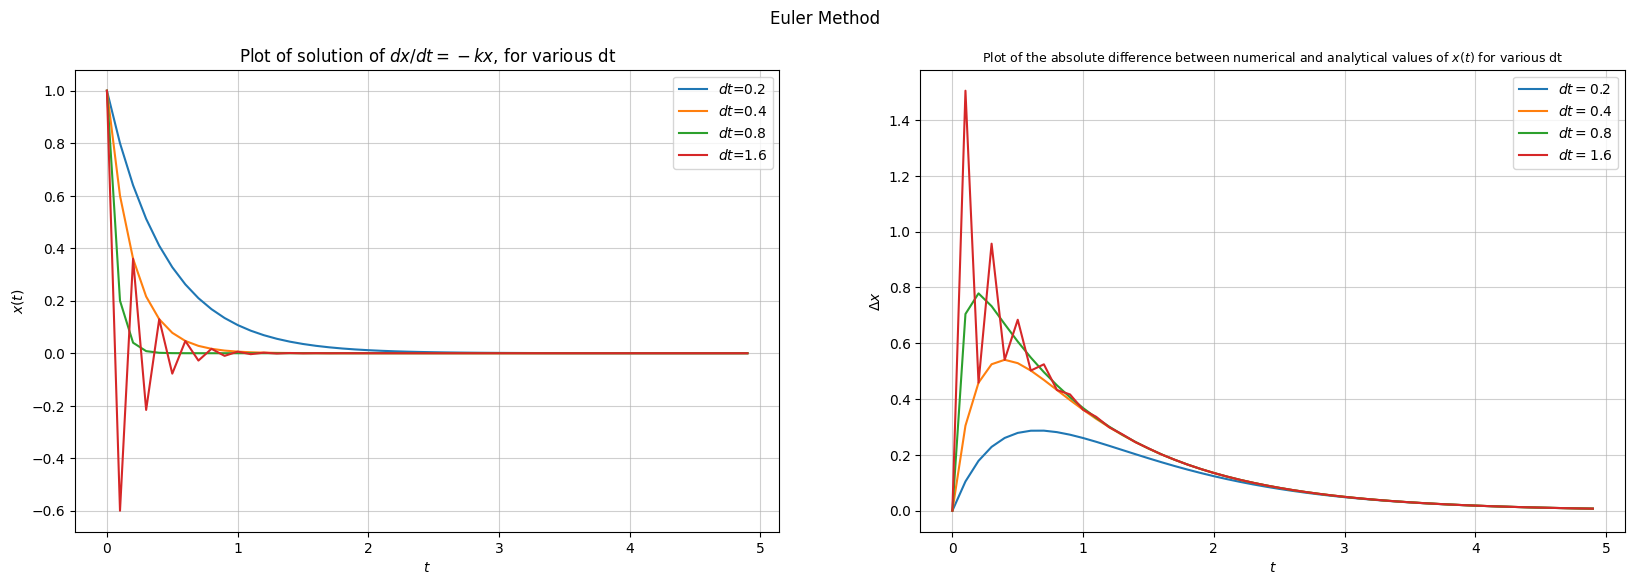

In [5]:
# Plot the results first
dt = [0.2, 0.4, 0.8, 1.6]

fig, axes = plt.subplots(1,2, figsize=(20,6))

for i in dt:
    x = euler(x_0, i, t)
    axes[0].plot(t, x, label=f"$dt$={i}")
    # Plot the difference
    axes[1].plot(t, abs(x - f(t)), label=f"$dt = {i}$")

for ax in axes:
    ax.set_xlabel(r"$t$")
    ax.legend()
    ax.grid(alpha=0.6)

axes[0].set_title(r"Plot of solution of $dx/dt = -kx$, for various dt")
axes[0].set_ylabel(r"$x(t)$")
axes[1].set_title(r"Plot of the absolute difference between numerical and analytical values of $x(t)$ for various dt", fontsize=9)
axes[1].set_ylabel(r"$\Delta x$")
plt.suptitle("Euler Method")
plt.show()

As we increase the value of $dt$, i.e. essentially decreasing the resolution of the method, we observe larger and larger deviations from the actual values of the derivative. It is more evident when looking at the absolute differences, which are larger for larger values of $dt$. As previously, they also tend to zero when $t$ increases due to the decaying exponential behaviour.

#### 1.2 Second order solver


Redo the same as before, but with the modifed Euler explicit scheme (see lecture)

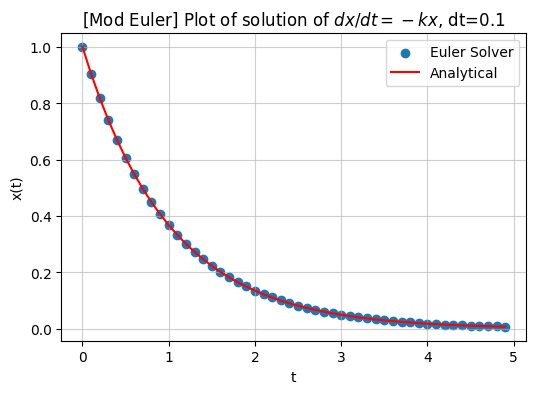

In [6]:
def mod_euler(x_0: float, dt: float, t: np.ndarray, deriv) -> np.ndarray:
    """Function implementing the second-order modified Euler solver (midpoint method) to an ordinary differential equation.
    Params:
    x_0 (float): initial value of x at t=0
    dt (float): time step
    t (np.ndarray): array of values of time for which to evaluate x(t)
    deriv (function): function of the derivative

    Returns:
    x: array of values of x(t)
    """

    # Initialise the result array
    x = np.array([])
    
    for idx, time in enumerate(t):
        if idx == 0: x = np.append(x, x_0)  
        else: 
            k1 = x[idx-1] + dt/2 * deriv(x[idx - 1], t)
            x = np.append(x, x[idx-1] + dt*deriv(k1, t+(dt/2)))
            
    return x

# Initial value x_0 = x(t=0)
x_0 = 1

# Time array
dt = 0.1 # Time step - resolution of the algorithm
t = np.arange(0, 5, dt)

# Solve the ODE
x_mod = mod_euler(x_0, dt, t, deriv)

# Analytical solution
f = lambda t: x_0*np.exp(-k*t)

fig, ax = plt.subplots(figsize=(6,4))
plt.scatter(t, x_mod, label="Euler Solver")
plt.plot(t, f(t), label="Analytical", color="r")

plt.title(r"[Mod Euler] Plot of solution of $dx/dt = -kx$, dt={}".format(dt))
ax.set_xlabel("t")
ax.set_ylabel("x(t)")

plt.legend()
plt.grid(alpha=0.6)
plt.show()

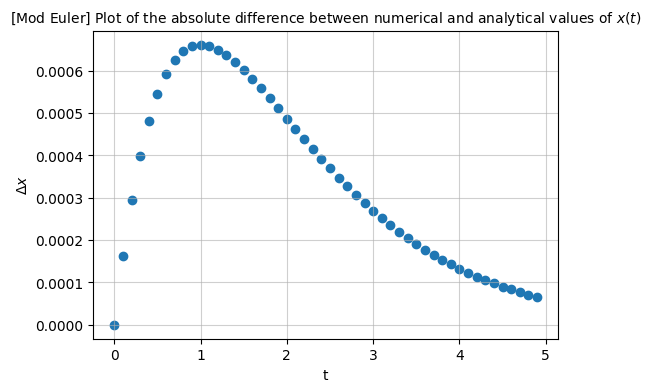

In [7]:
# Get the difference in x(t) values between the Euler solver and the analytical computation
dif = abs(x_mod - f(t)) # Numerical - Analytical

fig, ax = plt.subplots(figsize=(6,4))
plt.scatter(t, dif)

plt.title(r"[Mod Euler] Plot of the absolute difference between numerical and analytical values of $x(t)$", fontsize=10)
ax.set_xlabel("t")
ax.set_ylabel(r"$\Delta x$")
plt.grid(alpha=0.6)
plt.show()

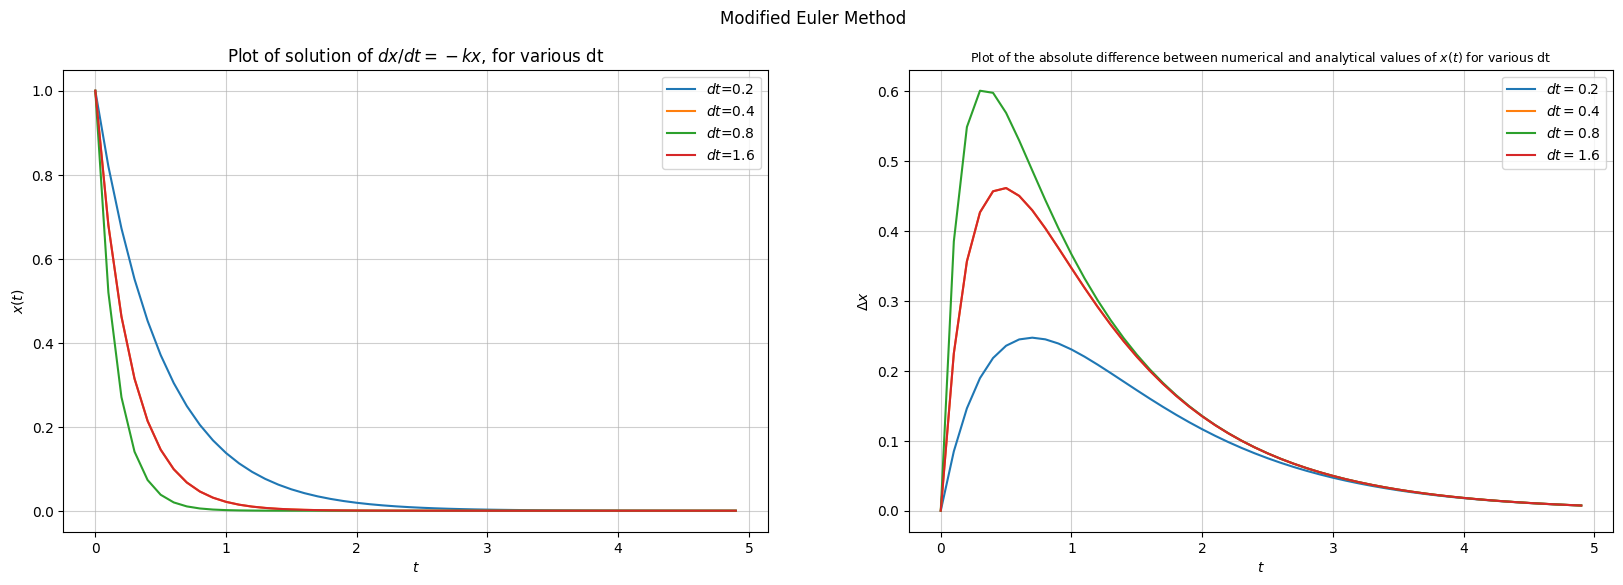

In [8]:
# Plot the results first
dt = [0.2, 0.4, 0.8, 1.6]

fig, axes = plt.subplots(1,2, figsize=(20,6))

for i in dt:
    x = mod_euler(x_0, i, t, deriv)
    axes[0].plot(t, x, label=f"$dt$={i}")
    # Plot the difference
    axes[1].plot(t, abs(x - f(t)), label=f"$dt = {i}$")

for ax in axes:
    ax.set_xlabel(r"$t$")
    ax.legend()
    ax.grid(alpha=0.6)

axes[0].set_title(r"Plot of solution of $dx/dt = -kx$, for various dt")
axes[0].set_ylabel(r"$x(t)$")
axes[1].set_title(r"Plot of the absolute difference between numerical and analytical values of $x(t)$ for various dt", fontsize=9)
axes[1].set_ylabel(r"$\Delta x$")
plt.suptitle("Modified Euler Method")
plt.show()

As we can see from the plots above, the modified Euler method is much more accurate than its first-order counterpart, even eliminating the spiking errors for larger values of the resolution $dt$. Naturally, we still observe the absolute errors tending to zero when $t$ increases. The lowest errors are obtained for the largest resolution $dt = 0.2$.

## 2 Energy conservative system: orbital motion in 2D (2nd order solver)

We now solve an energy conservative system, with no, or complex solution. We consider the gravity equation of a body with mass body with mass M. The equation of motion is :

$\frac{d^2X }{dt^2}=-\frac{GM}{r^2}\times\frac{X}{r}$


$\frac{d^2Y }{dt^2}=-\frac{GM}{r^2}\times\frac{Y}{r}$




Where G is the universal gravity constant and $r=(X^2+Y^2)^{1/2}$. This is a coupled system of 2 second order equations. Rewrite it as a system of 4 first order equations, using $Vx$ and $Vy$ : the X and Y component of velocity in cartesian coordinates.

The system of 4 first order equations is (utilising $r^2 = x^2 + y^2$)

$$ \frac{dV_x}{dt} = -\frac{GM}{(X^2 + Y^2)^{3/2}} \cdot X$$
$$ \frac{dV_y}{dt} = -\frac{GM}{(X^2 + Y^2)^{3/2}} \cdot Y$$
$$ V_x = \frac{dx}{dt}$$
$$ V_y = \frac{dy}{dt}$$


We will take the Earth-Moon system (check mass values on internet, work in METRIC SYSTEM UNITS !!) We will consider that the initial position of the moon at time=0 is X=384000km , Y=0, and that its velocity is Vx=0, $Vy=+a \omega $, where $a$ is the inital Earth-Moon distance (called semi-major axis), and $\omega=(GM/a^3)^{1/2}$ is the orbital angular velocity. The orbital period of the Moon, in, in theory should be $T=2\pi/\omega$

Write a function called $gravderiv(X,Y,Vx,Vy,t)$ that returns the derivative of vector (X,Y,Vx,Vy)

In [9]:
def gravderiv(init: list, t: float) -> np.ndarray:
    """Function calculating the derivatives of position and velocities of the orbital motion of the moon.
    Params:
    init (list): list of boundary conditions encapsulating 
            X (float): x-position
            Y (float): y-position
            Vx (float): x-velocity
            Vy (float): y-velocity
    
    Returns:
    [dX, dY, dVx, dVy] (np.ndarray): array of derivatives"""
    global G, M

    X, Y, Vx, Vy = init[0], init[1], init[2], init[3]
    
    # Accelerations
    dVx = -G * M * X/(X*X + Y*Y)**(3/2)
    dVy = -G * M * Y/(X*X + Y*Y)**(3/2)
    
    return np.array([Vx, Vy, dVx, dVy])


Write a program that integrate the Moon motion, from time=0 to time=100T, using the Modified Euler method.

In [10]:
def solve_orbit(deriv, init: list, period: float, dt: float, t0: float = 0.) -> tuple:
    """Function employing a solver to integrate the Moon's motion and obtain an orbit.

    Note: the output V is a matrix with four columns, each one representing different value: X, Y, Vx, Vy, respectively
    
    Params:
    deriv (func): derivative function
    init (list): list of initial conditions for the motion
    period (float): period of the orbit -> stopping point for the solver
    dt (float): time step
    t0 (float): intial time (default = 0)

    Returns:
    (V, T) (tuple): tuple of velocities, positions, and corresponding times
    """

    # Initialise the velocity + position, and time arrays
    V, T = np.array([i for i in init], ndmin=2), np.array([t0])

    # Copy the starting points of velocity + position and time arrays
    v, t = np.copy(V[0]), np.copy(T[0])

    # Employ the solver
    while t < period:
        # Calculate the derivative at point v_n, t_n
        f = deriv(v, t)
        
        # Calculate the derivative at point v_n + dt/2 * f(v_n, t), t_n + dt/2
        F = deriv(v + (f* dt/2), t + dt/2)

        # Propagate the motion by dt
        v += dt * F
        t = t + dt

        # Update the arrays
        V = np.append(V, np.array(v, ndmin=2), axis=0)
        T = np.append(T, t)

    return (V, T)
    

In [11]:
# Global constants
G = 6.6743e-11
M = 5.972e24 # Mass of Earth
m = 7.347e22 # Mass of Moon

# Additional constants
a = 3.84e8 # semi-major axis
omega = np.sqrt((G*M/a**(3)))
period = 2*np.pi/omega # Moon's orbital period 

# Initial conditions t=0
X0 = 3.84e8
Y0 = 0.
Vx0 = 0.
Vy0 = a*omega
# -> Create an array
init = [X0, Y0, Vx0, Vy0]

Use first a time-step dt= 0.01T . Plot the Moon motion X(t), Y(t), Vx(t), Vy(t)

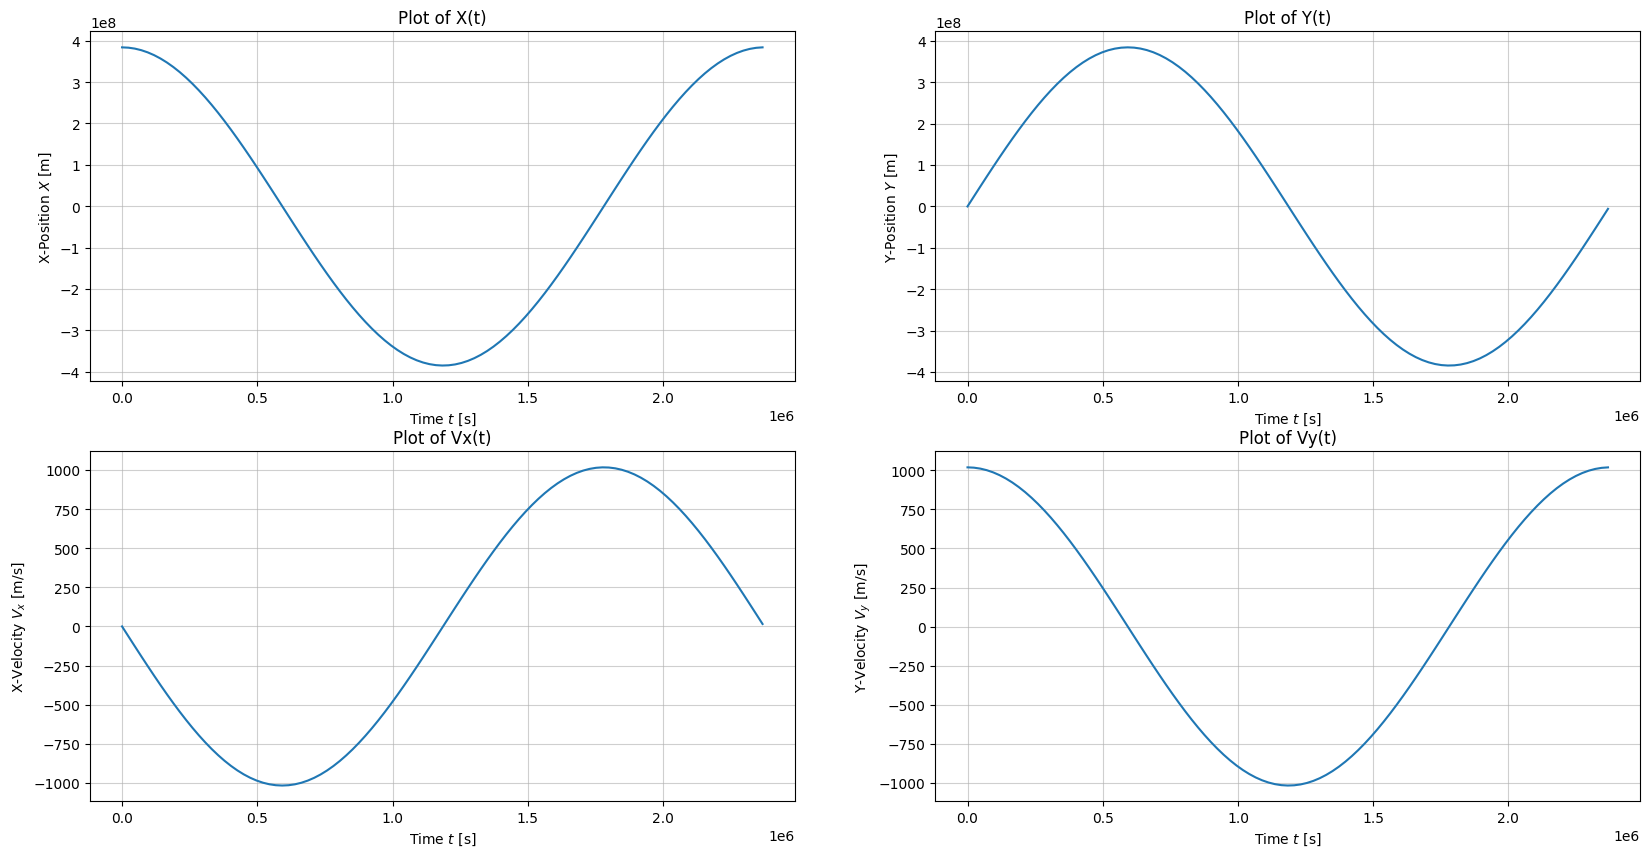

In [12]:
# Time array
dt = 0.01 * period

V, T = solve_orbit(gravderiv, init, period, dt, t0=0)

X, Y, Vx, Vy = V[:,0], V[:, 1], V[:, 2], V[:, 3]

# Plot the motion
fig, axes = plt.subplots(2, 2,figsize=(20,10))

# X(t)
axes[0,0].set_title("Plot of X(t)")
axes[0,0].set_xlabel(r"Time $t$ [s]")
axes[0,0].set_ylabel(r"X-Position $X$ [m]")
axes[0,0].plot(T, X)
axes[0,0].grid(alpha=0.6)

# Y(t)
axes[0,1].set_title("Plot of Y(t)")
axes[0,1].set_xlabel(r"Time $t$ [s]")
axes[0,1].set_ylabel(r"Y-Position $Y$ [m]")
axes[0,1].plot(T, Y)
axes[0,1].grid(alpha=0.6)

# Vx(t)
axes[1,0].set_title("Plot of Vx(t)")
axes[1,0].set_xlabel(r"Time $t$ [s]")
axes[1,0].set_ylabel(r"X-Velocity $V_x$ [m/s]")
axes[1,0].plot(T, Vx)
axes[1,0].grid(alpha=0.6)

# Vy(t)
axes[1,1].set_title("Plot of Vy(t)")
axes[1,1].set_xlabel(r"Time $t$ [s]")
axes[1,1].set_ylabel(r"Y-Velocity $V_y$ [m/s]")
axes[1,1].plot(T, Vy)
axes[1,1].grid(alpha=0.6)


plt.show()

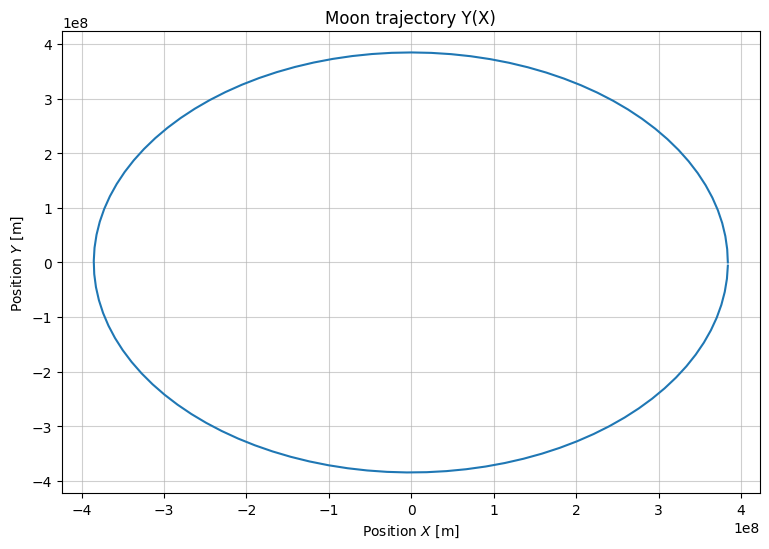

In [13]:
# We can also plot the trajectory of the orbits in the x-y plane
fig, ax = plt.subplots(figsize=(9,6))
plt.title("Moon trajectory Y(X)")
plt.xlabel(r"Position $X$ [m]")
plt.ylabel(r"Position $Y$ [m]")
plt.plot(X,Y)
plt.grid(alpha=0.6)
plt.show()

Compute at every time-step the total energy $E_T$ (Kinetic + Potential). Plot energy variations $\Delta_E(t)=\frac{E_T(t)-E_T(t=0)}{E_T(t=0)}$. Is energy really constant ? What happens in your opinion? 

Let us recall that the total energy is given by the Hamiltonian functional $H$ accounting for the gravitational potential $V(r)$

$$ H(t) = \frac{m}{2}(v_x^2 + v_y^2) - G\frac{Mm}{\sqrt{x^2 + y^2}},$$
where $M$ and $m$ are the masses of the Earth and Moon in the system, respectively. Note that the time-dependence is encoded in the velocities and positions.

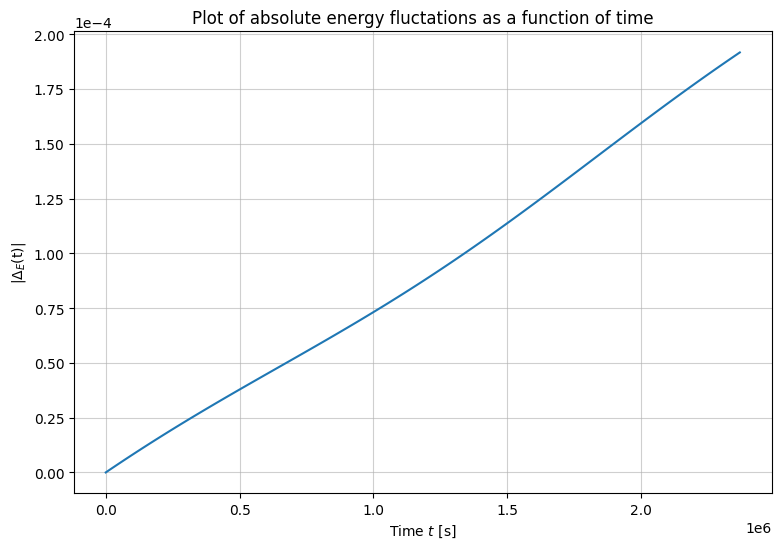

In [14]:
# Calculate the energy at each time
energy = (m/2) * (Vx*Vx + Vy*Vy) - G * M * m/(np.sqrt(X * X + Y * Y))

# Calculate the variations
delta = (energy - energy[0])/energy[0]
    
# Plot the energy variations as a function of time
fig, ax = plt.subplots(figsize=(9,6))
plt.plot(T, abs(delta))
plt.title("Plot of absolute energy fluctations as a function of time")
plt.xlabel("Time $t$ [s]")
plt.ylabel(r"$|\Delta_E$(t)|")
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.grid(alpha=0.6)
plt.show()

The energy fluctation plot displays a positve slope, meaning that as time progresses, the absolute value of the energy increases. This is in apparent violation of the energy conservation in the system, however, when we take into account the magnitude of the increase being rather minimal compared to the actual values, we can infer that this comes from the error in the method employed throughout the integration scheme.

Redo the same for dt=0.1T and dt=0.5T: Plot the orbit in (X,Y) frame and $E_T$ as a function of time.

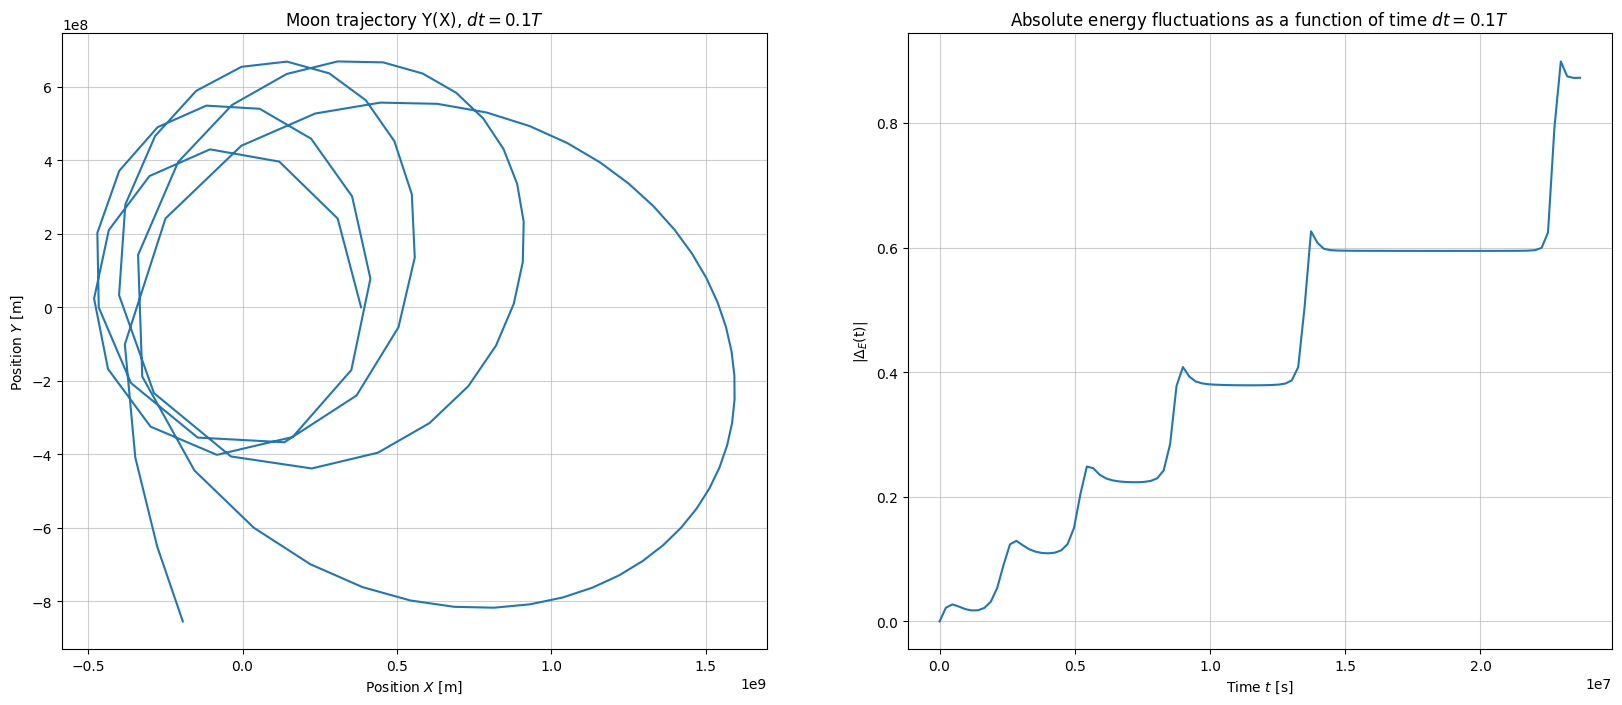

In [15]:
# dt = 0.1T
dt = 0.1 * period

V, T = solve_orbit(gravderiv, init, 10*period, dt, t0=0)

X, Y, Vx, Vy = V[:,0], V[:, 1], V[:, 2], V[:, 3]

# Calculate the energy at each time
energy = (m/2) * (Vx*Vx + Vy*Vy) - G * M * m/(np.sqrt(X * X + Y * Y))

# Calculate the variations
delta = (energy - energy[0])/energy[0]

fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].plot(X,Y)
ax[0].set_title("Moon trajectory Y(X), $dt = 0.1T$")
ax[0].set_xlabel(r"Position $X$ [m]")
ax[0].set_ylabel(r"Position $Y$ [m]")
ax[0].grid(alpha=0.6)

ax[1].plot(T, abs(delta))
ax[1].set_title("Absolute energy fluctuations as a function of time $dt = 0.1T$")
ax[1].set_xlabel(r"Time $t$ [s]")
ax[1].set_ylabel(r"$|\Delta_E$(t)|")
ax[1].grid(alpha=0.6)

plt.show()


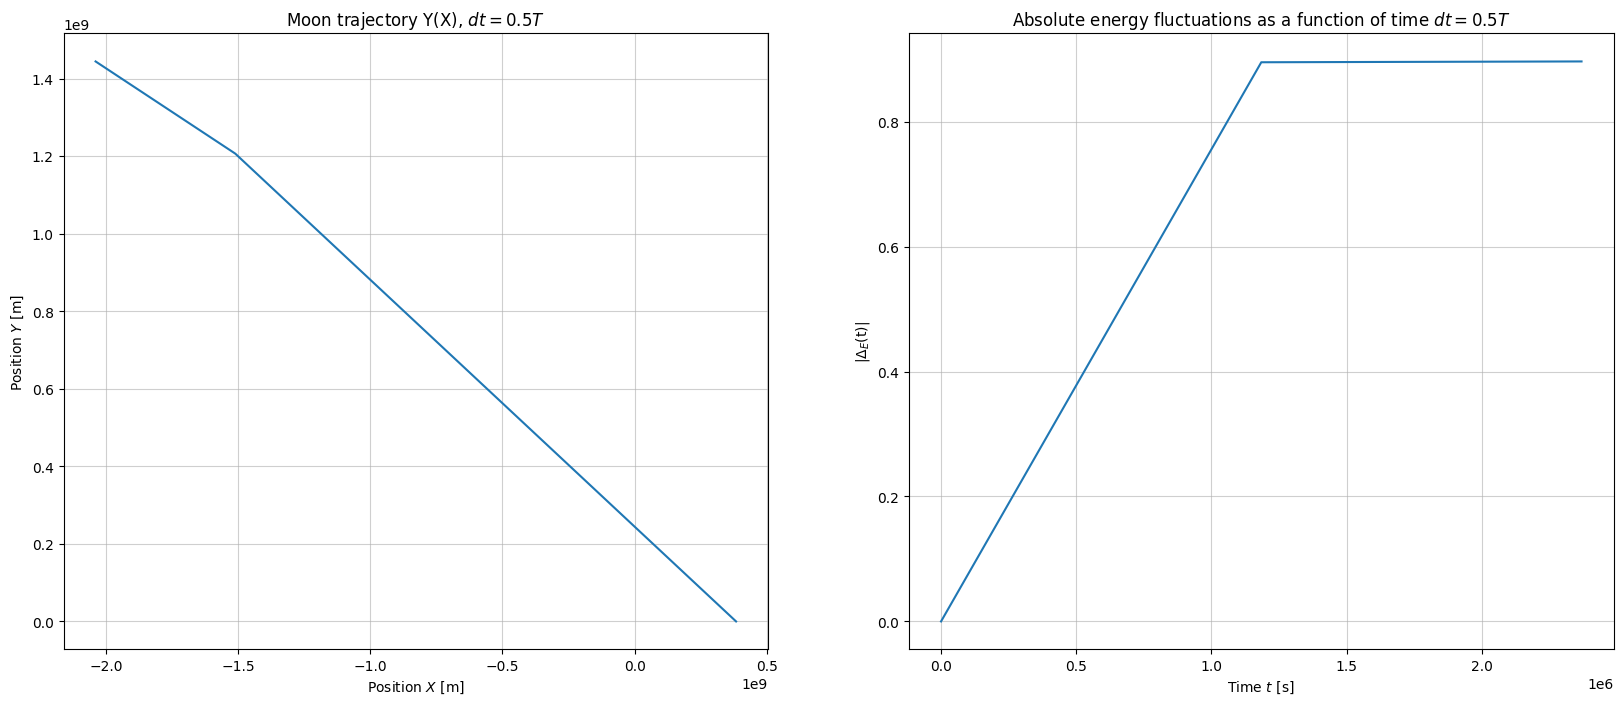

In [16]:
# dt = 0.5T
dt = 0.5 * period

V, T = solve_orbit(gravderiv, init, period, dt, t0=0)

X, Y, Vx, Vy = V[:,0], V[:, 1], V[:, 2], V[:, 3]

# Calculate the energy at each time
energy = (m/2) * (Vx*Vx + Vy*Vy) - G * M * m/(np.sqrt(X * X + Y * Y))

# Calculate the variations
delta = (energy - energy[0])/energy[0]

fig, ax = plt.subplots(1,2, figsize=(20, 8))
ax[0].plot(X,Y)
ax[0].set_title("Moon trajectory Y(X), $dt = 0.5T$")
ax[0].set_xlabel(r"Position $X$ [m]")
ax[0].set_ylabel(r"Position $Y$ [m]")
ax[0].grid(alpha=0.6)

ax[1].plot(T, abs(delta))
ax[1].set_title("Absolute energy fluctuations as a function of time $dt = 0.5T$")
ax[1].set_xlabel(r"Time $t$ [s]")
ax[1].set_ylabel(r"$|\Delta_E$(t)|")
ax[1].grid(alpha=0.6)

plt.show()

C:\Users\okwas\AppData\Local\Temp\ipykernel_43384\707584823.py:43: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


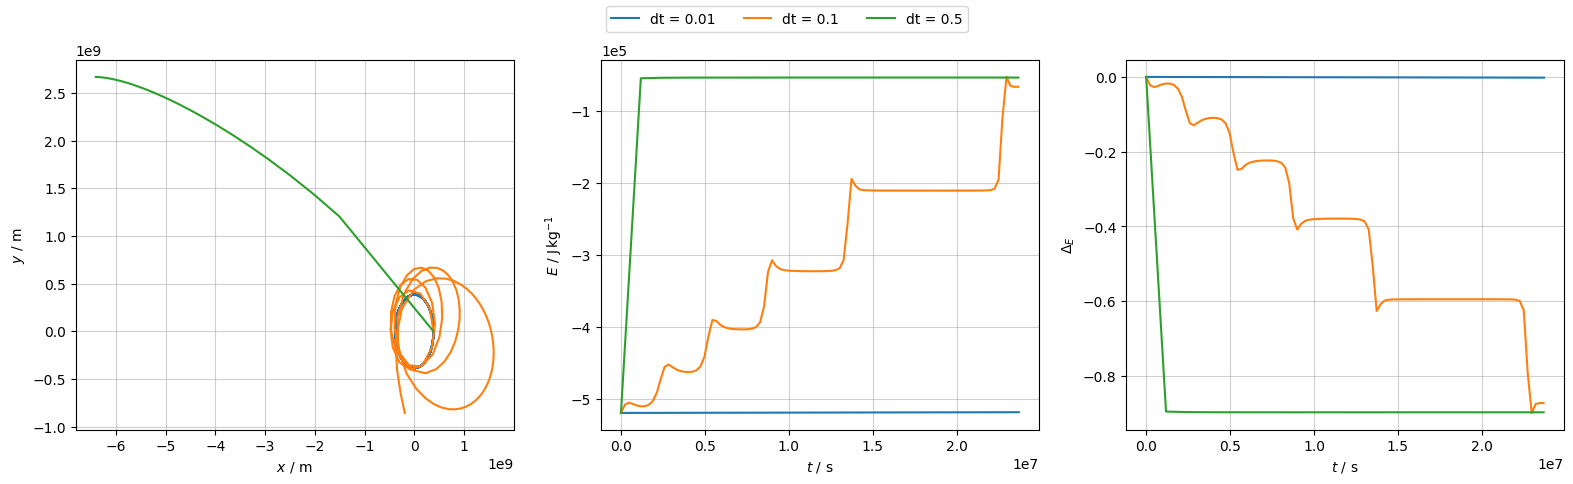

In [17]:
# Plot all trajectories/energies in a single plot

def get_energy(vars: np.ndarray) -> np.ndarray:
    """Function calculating the total energy of the orbital system
    Params:
    vars (np.ndarray): array of positions/velocities
    
    Returns:
    E_p + E_k (np.ndarray): array of sum of kinetic + potential energies for each time point"""
    global G, M
    x, y, vx, vy = vars[:, 0], vars[:, 1], vars[:, 2], vars[:, 3]
    E_p = - G*M / np.sqrt(x**2 + y**2)
    E_k = (vx**2 + vy**2) / 2
    return E_p + E_k

def get_delta_energy(vars: np.ndarray) -> np.ndarray:
    """Function calculating the energy fluctuations based on get_energy()."""
    E = get_energy(vars)
    return (E - E[0]) / E[0]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(19.2, 4.8))

for dt in [0.01, 0.1, 0.5]:
    V, T = solve_orbit(gravderiv, init, 10*period, dt*period)

    ax1.plot(V[:, 0], V[:, 1], label=f'dt = {dt}')
    ax1.set_xlabel(r'$x~/~\text{m}$')
    ax1.set_ylabel(r'$y~/~\text{m}$')
    ax1.grid(alpha=0.6)

    ax2.plot(T, get_energy(V))
    ax2.set_xlabel(r'$t~/~\text{s}$')
    ax2.set_ylabel(r'$E~/~\text{J}\,\text{kg}^{-1}$')
    ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax2.grid(alpha=0.6)

    ax3.plot(T, get_delta_energy(V))
    ax3.set_xlabel(r'$t~/~\text{s}$')
    ax3.set_ylabel(r'$\Delta_E$')
    ax3.grid(alpha=0.6)

fig.legend(loc='upper center', fancybox=True, ncols=3)
fig.show()

Conclusion : What time-step should you use ? 

We should employ the smallest timestep possible, for example $dt = 0.01T$, which displayed a consistent ellipsoidal orbit and relatively small energy fluctuations. When we increase the time step, we calculate fewer and fewer points with the ultimate result of not resembling an orbital motion any more. There is a fine balance between the size of the time step and the computation efficiency, especially for large number of values, however, for our purposes, $dt=0.01 T$ seems to represent the physical effect quite well.

How to control the quality of your solution  in your opinion?

The quality of the solution outputted by a given ODE solver with input parameters may be controlled by introducing control parameters, which should be checked throughout the execution of the programme. One of such parameters could be the aforementioned enegry fluctuations. We know that the total energy of an isolated system should remain constant and so the fluctuations in the value should ideally be zero. However, we need to take into account machine precision and the proper intervals to investigate this quantity in. When the energy fluctiations are miniscule compared to the total energy given by out programme, we may conclude that the solution is acceptable. If throughout the execution, these quantities change drastically, we may include a feedback system, which would for alter the input parameters (e.g. the time step dt) such that the solution is still considered accurate and does not yield any unphysical behaviour.

Now, let's consider a more complicated orbit. Start the same integration, but now the initial velocity has a small X component initially at t=0: $Vx=e V_y$, $Vy=+a \omega $, with $abs(e) < 1$. Choose e=0.01 and then e=0.1.

In [18]:
def get_init(e: float) -> list:
    """Function defining initial conditions depending on the eccentricity
    Params:
    e (float): eccentricity

    Returns:
    list of initial conditions"""

    global a, omega
    return [a, 0., e*a*omega, a*omega]

Display energy variations for e=0.01 and then e=0.1. What do you see ?

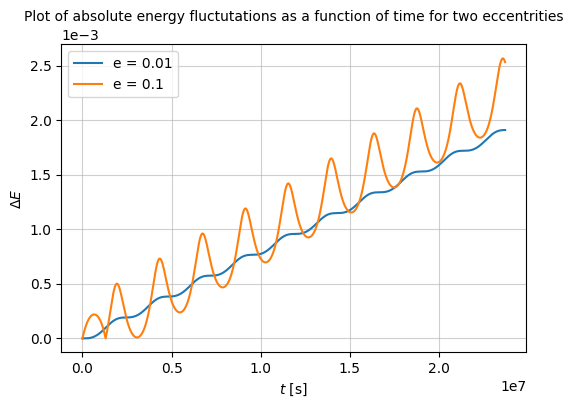

In [19]:
fig, ax = plt.subplots(figsize=(6,4))
dt = 0.01*period

for e in [0.01, 0.1]:
    V, T = solve_orbit(gravderiv, get_init(e), 10*period, dt)
    
    plt.plot(T, abs(get_delta_energy(V)), label=f"e = {e}")
    plt.xlabel(r"$t$ [s]")
    plt.ylabel(r"$\Delta E$")

plt.title("Plot of absolute energy fluctutations as a function of time for two eccentrities", fontsize=10)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend()
plt.grid(alpha=0.6)
plt.show()

While both energy fluctuations for $e=0.01$ and $e=0.1$ are increasing in time, as investigated previously for a perfect ellipse, now the smaller eccentricity displays a more noticeable oscillating behaviour. It is also increasing faster that the smaller eccentricity case, as time progresses. This could hint at the increase in calculation complexitiy to be carried out by the program for more distorted orbits, yielding much more residual uncertainties.

## 3 Energy conservative system 2 : going to 4th order

Re-use the function that computes the derivative for  planetary motion (exercice 2). Now change the solver and code a Runge Kutta 4 scheme, that is 4th order. Put your code below. 

In [20]:
def moon_rk4(deriv, init:list, period:float, dt:float, t0=0) -> tuple:
    """Rewritten planetary motion solver solve_orbit() using the Runge-Kutta 4 scheme."""

    V, T = np.array([v0 for v0 in init], ndmin=2), np.array([t0])
    v, t = np.copy(V[0]), np.copy(T[0])

    while t < period:
        k1 = dt * deriv(v, t)
        k2 = dt * deriv(v + k1/2, t + dt/2)
        k3 = dt * deriv(v + k2/2, t + dt/2)
        k4 = dt * deriv(v + k3, t + dt)
        v += (k1 +2*k2 + 2*k3 + k4)/6
        t = t + dt
        V = np.append(V, np.array(v, ndmin=2), axis=0)
        T = np.append(T, t)
    
    return (V, T)

Using the same time-steps as before, plot the motion of the moon, and now compute and display energy variations as a function of time.

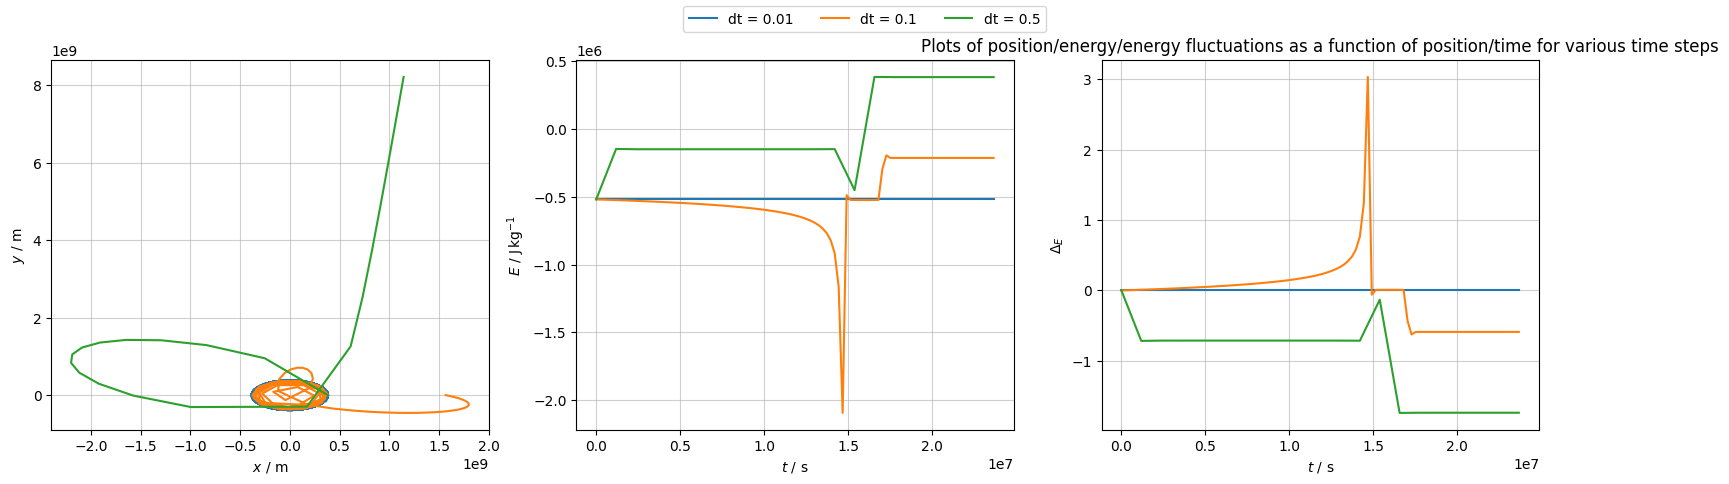

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(19.2, 4.8))

for dt in [0.01, 0.1, 0.5]:
    V, T = moon_rk4(gravderiv, init, 10*period, dt*period)

    ax1.plot(V[:, 0], V[:, 1], label=f'dt = {dt}')
    ax1.set_xlabel(r'$x~/~\text{m}$')
    ax1.set_ylabel(r'$y~/~\text{m}$')
    ax1.grid(alpha=0.6)

    ax2.plot(T, get_energy(V))
    ax2.set_xlabel(r'$t~/~\text{s}$')
    ax2.set_ylabel(r'$E~/~\text{J}\,\text{kg}^{-1}$')
    ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax2.grid(alpha=0.6)

    ax3.plot(T, get_delta_energy(V))
    ax3.set_xlabel(r'$t~/~\text{s}$')
    ax3.set_ylabel(r'$\Delta_E$')
    ax3.grid(alpha=0.6)

fig.legend(loc='upper center', fancybox=True, ncols=3)
plt.title("Plots of position/energy/energy fluctuations as a function of position/time for various time steps")
plt.show()

It may be also interesting to plot the angular momentum of the Moon as a function of time. This should be also conserved. Is it the case ?

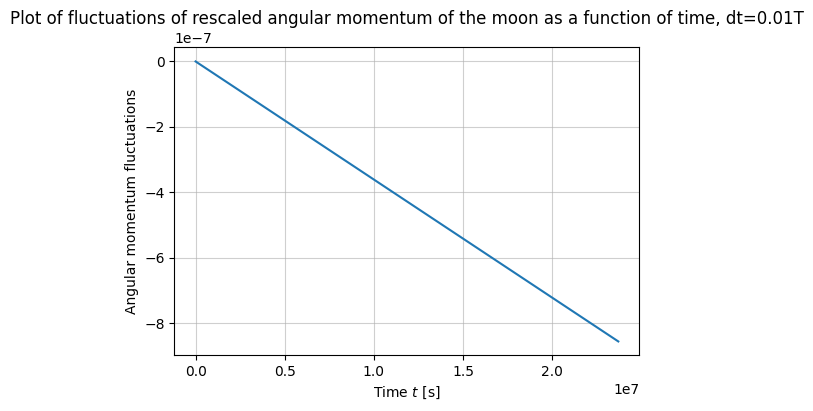

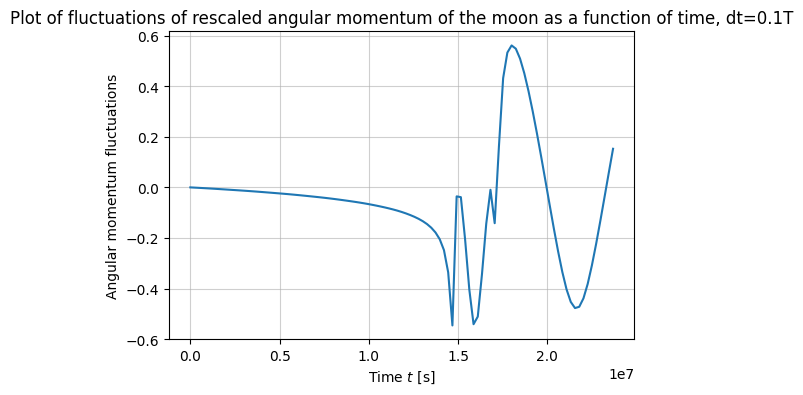

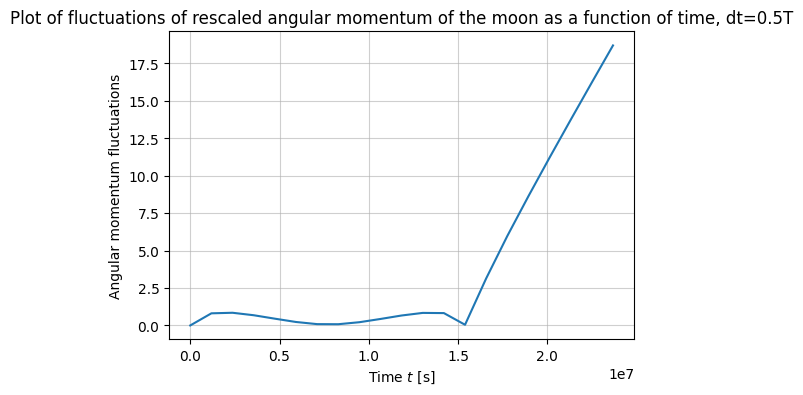

In [22]:
for dt in [0.01, 0.1, 0.5]:
    V, T = moon_rk4(gravderiv, init, 10*period, dt*period)
    # Calculate the (rescaled) angular momentum
    ang_mom = np.sqrt(V[:, 2]*V[:, 2] + V[:, 3] * V[:, 3]) * np.sqrt(V[:, 0] * V[:, 0] + V[:, 1] * V[:, 1])
    delta_ang = (ang_mom - ang_mom[0])/ang_mom[0]
    
    fig, ax = plt.subplots(figsize=(6,4))
    plt.plot(T, delta_ang)
    plt.title(f"Plot of fluctuations of rescaled angular momentum of the moon as a function of time, dt={dt}T")
    plt.xlabel(r"Time $t$ [s]")
    plt.ylabel(r"Angular momentum fluctuations")
    plt.grid(alpha=0.6)
    plt.show()

The fluctuations in the angular momentum of the moon seem to oscillate around the zero-level for the beginning of the integration period, however, for large times, they increase linearly, indicating a non-physicality of the solution at this interval. Moreover, as the the input time interval increases, these anomalies become more prominent, with the least divergence observed for dt being 0.1 of the period of motion.

## 4 : Interest of implicit solver ! Free-Fall in a viscous fluid

We consider the motion of a particule with mass m, radius r free-faling in a fluid. The particle is inserted at altitude Z with 0 velocity initially.  It suffers the weight force ($Fg=-mg$) plus a friction force, the "Stokes Force", so that :

$F_S =-6\pi \mu r v$

with $\mu$ is the fluid dynamical viscosity (in Pa $\cdot$ S) , r is the particle radius, and v is its velocity (positive when directed upward, negative when directed downward, so that the Z axis is directed upward by convention). Note that we will neglect here the buoyancy forces (sum of pressure forces onto the ball).

We solve the system of equation $\frac{dZ}{dt}=?$ and $\frac{d V_Z }{dt}=?$

Write the system of equation we want to  solve. We call U the vector U(t)=(Z(t),$V_z(t)$)

$$ \frac{dz}{dt} = v_z$$
$$ m\frac{d^2z}{dt^2} = 6\pi\mu r \frac{dz}{dt} - mg \implies \frac{dv_z}{dt} = \frac{6\pi\mu r v_z}{m} - g$$
Note that $m = \Delta \rho \frac{4\pi r^3}{3},$ where $\Delta \rho$ refers to the difference of densities between the medium and the particle.
$$ \frac{dv_z}{dt} = \frac{9\mu v}{2\Delta \rho r^2} - g$$

Write a function call Deriv_free_fall$(U,t)$ that returns $\frac{dU}{dt}$

In [23]:
def deriv_free_fall(U: list, t: float) -> np.ndarray:
    """Function returning the derivative of the vector of position and velocity in the z-direction as a function of time.
    Params:
    U (list): list of Z(t), Vz(t)
    t (float): time parameter
    
    Returns:
    Vz(t), dVz(t): derivatives"""
    global c, g
    z, vz = U[0], U[1]

    return np.array([vz, -c*vz - g])

Solve the motion of the particle, using $\mu=1\times 10^{-3} kg/m/s$ (dynamic viscosity of water) and for radius=1cm, and for material density $\rho=3000 Kg/m^3$. Plot Z(t) and Vz(t) using explicit Euler. 

In [24]:
# Define constants
g = 9.81
c = (9*np.pi * 1e-3)/(2 * 3e3 * (1e-2)**2)
bc = np.array([0., 0.])

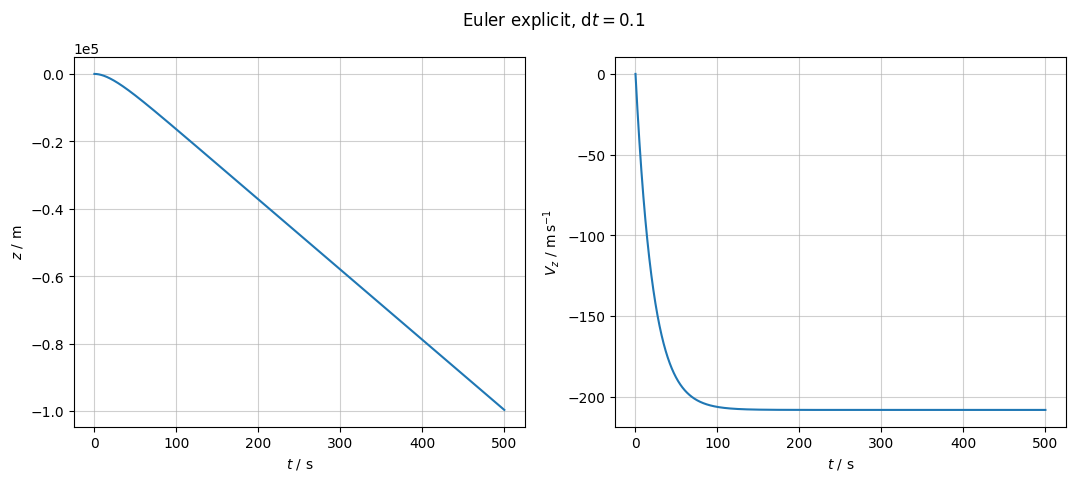

In [25]:
def ff_euler_exp(derivative, bc, period, dt, t0=0):
    """Function implementing the explicit Euler scheme for integration."""
    U, T = np.array([u0 for u0 in bc], ndmin=2), np.array([t0])
    u, t = np.copy(U[0]), np.copy(T[0])

    while t < period:
        u += dt * derivative(u, t)
        t = t + dt
        U = np.append(U, np.array(u, ndmin=2), axis=0)
        T = np.append(T, t)
    
    return (U, T)

U, T = ff_euler_exp(deriv_free_fall, bc, 5*1e2, 0.1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.8, 4.8))

ax1.plot(T, U[:, 0])
ax1.set_xlabel(r'$t~/~\text{s}$')
ax1.set_ylabel(r'$z~/~\text{m}$')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.grid(alpha=0.6)

ax2.plot(T, U[:, 1])
ax2.set_xlabel(r'$t~/~\text{s}$')
ax2.set_ylabel(r'$V_z~/~\text{m}\, \text{s}^{-1}$')
ax2.grid(alpha=0.6)

fig.suptitle(r'Euler explicit, $\text{d}t = 0.1$')
plt.show()

What is the terminal velocity $V_T$ ? 

In [26]:
# Last element of the array
vt = U[-1, 1]
print(f"Terminal velocity = {vt:.2f} [m/s]")

Terminal velocity = -208.17 [m/s]


What is the coupling timescale $\tau$ (time necessary for the particle to reach 1/2 of $V_T$)

In [27]:
# Find first index of the velocity array where vt/2 <= vz 
for idx, u in enumerate(U[:, 1]):
    if abs(u) >= abs(vt/2):
        tau = T[idx]
        break
print(f"Coupling timescale {tau:.2f} [s]")

Coupling timescale 14.70 [s]


Now try to integrate the motion with dt=2 $\tau$  ? What happens ?

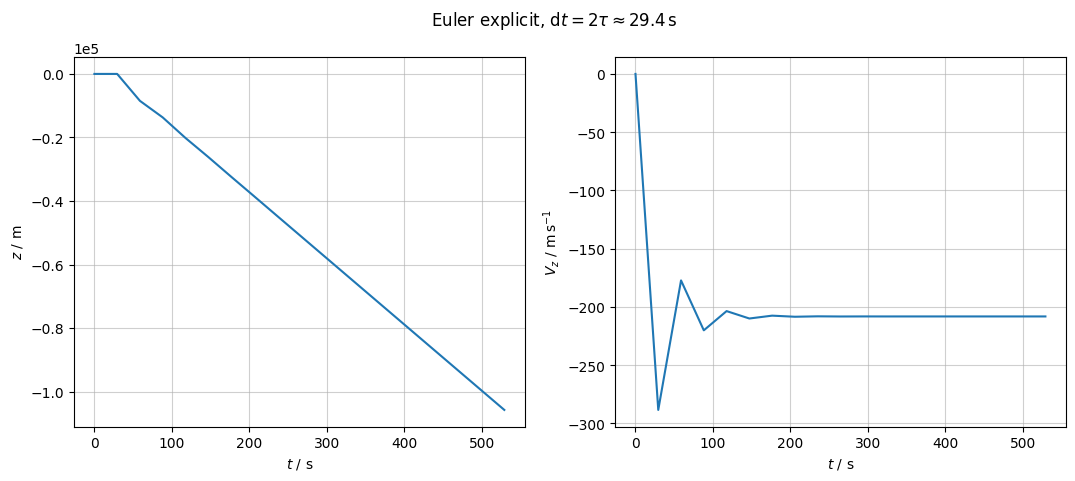

In [28]:
U, T = ff_euler_exp(deriv_free_fall, bc, 5*1e2, 2*tau)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.8, 4.8))

ax1.plot(T, U[:, 0])
ax1.set_xlabel(r'$t~/~\text{s}$')
ax1.set_ylabel(r'$z~/~\text{m}$')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.grid(alpha=0.6)

ax2.plot(T, U[:, 1])
ax2.set_xlabel(r'$t~/~\text{s}$')
ax2.set_ylabel(r'$V_z~/~\text{m}\, \text{s}^{-1}$')
ax2.grid(alpha=0.6)

fig.suptitle(rf'Euler explicit, $\text{{d}}t = 2\tau \approx {2*tau:.3n}\,\text{{s}}$')
plt.show()

Using the time step of twice the coupling timescale yields unphysical behaviour of the system, where the velocity in the positive z-direction increases, meaning the particle gains some speed upwards, instead of along the direction of gravity. This behaviour can be noticed in the graph with clear spikes in the range 0-100 s.

In order to cure that problem, we want to switch to an IMPLICIT EULER METHOD (1st order).
Write the Euler implicit numerical scheme  ($U_{n+1}=$ a function of $U_{n+1}$ and $U_n$)

By solving analytically the above equation, derive an equation allowing to compute $U_{n+1}$ as a function of $U_n$

$$
\begin{cases}
   z_{n+1} = z_n + \text{d}t \cdot \frac{\text{d}z_{n+1}}{\text{d}t} = z_n + \text{d}t \cdot v_{n+1} \\
   v_{n+1} = v_n + \text{d}t \cdot \frac{\text{d}v_{n+1}}{\text{d}t} = v_n + \text{d}t \cdot (-c v_{n+1} - g) = v_n - c v_{n+1} \,\text{d}t -  g \,\text{d}t \\
\end{cases}
$$

$$
\therefore \underbrace{(1 + c\,\text{d}t)}_{\alpha}v_{n+1} = v_n - g\,\text{d}t 
$$

$$
\begin{cases}
   z_{n+1} = z_n + \text{d}t \cdot v_{n+1} = z_n + \frac{\text{d}t}{\alpha} (v_n - g \,\text{d}t) \\
   v_{n+1} = \frac{1}{\alpha} (v_n - g \,\text{d}t) \\
   \alpha = 1 + c\,\text{d}t
\end{cases}
$$

Write a code that solve implicitely the motion of the particle in the viscous fluid.

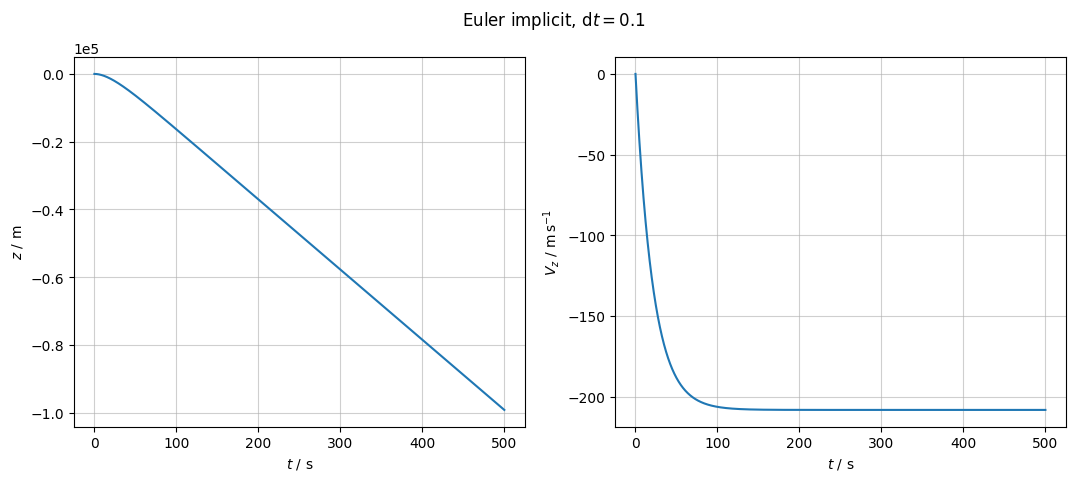

In [29]:
def ff_euler_imp(bc, t0, tN, dt):
    global c
    U, T = np.array([u0 for u0 in bc], ndmin=2), np.array([t0])
    z, v, t = np.array([bc[0]]), np.array([bc[1]]), np.copy(T[0])
    inv_alpha = 1 / (1 + c * dt)
    
    while t < tN - dt:
        v = inv_alpha * (v - dt*g)
        z = z + dt*inv_alpha * v
        t += dt

        u = np.transpose(np.array([z, v], ndmin=2))
        U = np.append(U, np.array(u, ndmin=2), axis=0)
        T = np.append(T, t)
    return (U, T)

U, T = ff_euler_imp(bc, 0., 5*1e2, 0.1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.8, 4.8))

ax1.plot(T, U[:, 0])
ax1.set_xlabel(r'$t~/~\text{s}$')
ax1.set_ylabel(r'$z~/~\text{m}$')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.grid(alpha=0.6)

ax2.plot(T, U[:, 1])
ax2.set_xlabel(r'$t~/~\text{s}$')
ax2.set_ylabel(r'$V_z~/~\text{m}\, \text{s}^{-1}$')
ax2.grid(alpha=0.6)

fig.suptitle(r'Euler implicit, $\text{d}t = 0.1$')
plt.show()

Try different timesteps from 0.1$\tau$ to 2$\tau$ ? Does the integration breaks even for big timestep ?


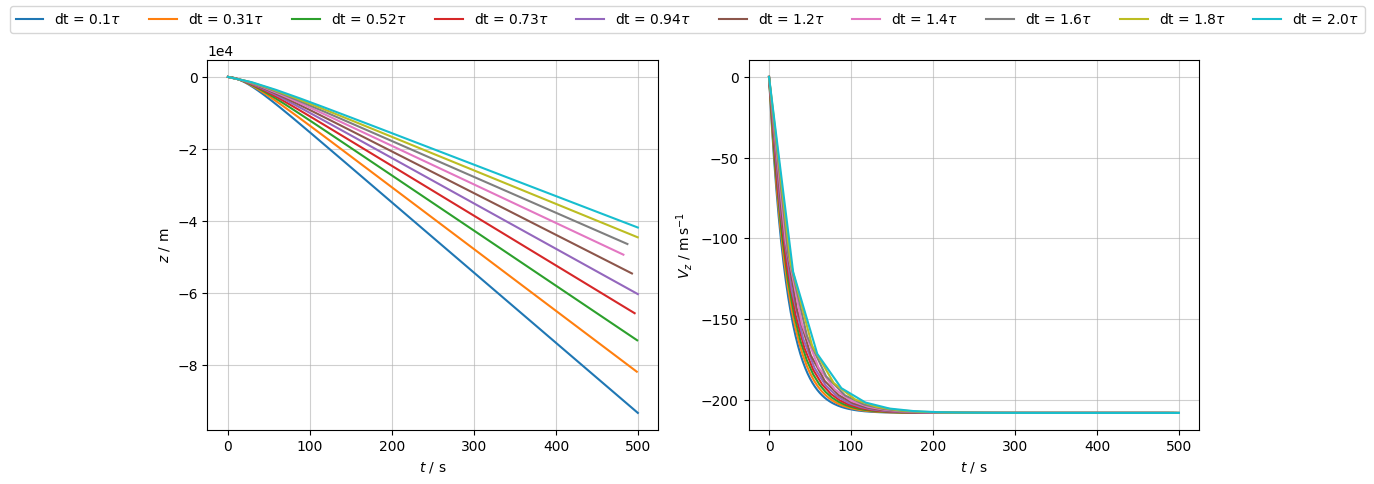

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.8, 4.8))

timesteps = np.linspace(0.1, 2, 10)

for dt in timesteps:
    U, T = ff_euler_imp(bc, 0., 5*1e2, dt*tau)

    ax1.plot(T, U[:, 0], label=rf'dt = {dt:.2}$\tau$')
    ax1.set_xlabel(r'$t~/~\text{s}$')
    ax1.set_ylabel(r'$z~/~\text{m}$')
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax1.grid(alpha=0.6)

    ax2.plot(T, U[:, 1])
    ax2.set_xlabel(r'$t~/~\text{s}$')
    ax2.set_ylabel(r'$V_z~/~\text{m}\, \text{s}^{-1}$')
    ax2.grid(alpha=0.6)

fig.legend(loc='upper center', fancybox=True, ncol=len(timesteps))
plt.show()

Through expressing $U_{n+1}$ as a function of $U_{n+1}$ and $U_n$, we have omitted the unphysical behaviour displayed before, even when using large timesteps. Utilising implicit solvers is key when we need to ensure stability of the solution. Even though the methods might be less accurate than other explicit methods at the beginning, for large times, the divergent behaviour is eliminated, resulting in a sensible numerical solution.

THIS IS THE MAGIC OF IMPLICIT SOLVERS !